In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
feat = np.loadtxt('../housing_train.dat')
price = np.loadtxt('../housing_prices_train.dat')
feat_test = np.loadtxt('../housing_test.dat')
price_test = np.loadtxt('../housing_prices_test.dat')

In [71]:
from sklearn.gaussian_process import GaussianProcess
from sklearn.cross_validation import KFold

# Estimate rms by K-folding

In [72]:
k = 30
gp = GaussianProcess(corr='squared_exponential')
kf = KFold(len(price), k)
rms = np.zeros(k)
for i, (train_index, test_index) in enumerate(kf):
    gp.fit(feat[train_index, :] , price[train_index])
    price_t, dprice_t = gp.predict(feat[test_index, :], eval_MSE=True)
    rms[i] = np.std(price[test_index] - price_test)

ValueError: operands could not be broadcast together with shapes (10,) (206,) 

In [73]:
rms

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [74]:
np.median(rms)

0.0

# Fit GP on all data and test against test sample

In [75]:
gp = GaussianProcess(corr='squared_exponential')
gp.fit(feat, price)

GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x7f8d651e1050>,
        normalize=True, nugget=array(2.220446049250313e-15),
        optimizer='fmin_cobyla', random_start=1,
        random_state=<mtrand.RandomState object at 0x7f8d915b2f18>,
        regr=<function constant at 0x7f8d651d4c08>, storage_mode='full',
        theta0=array([[ 0.1]]), thetaL=None, thetaU=None, verbose=False)

In [76]:
y_pred, dy_pred = gp.predict(feat_test, eval_MSE=True)

In [77]:
# RMS for test sample
np.std(price_test-y_pred)

4.9564985583622923

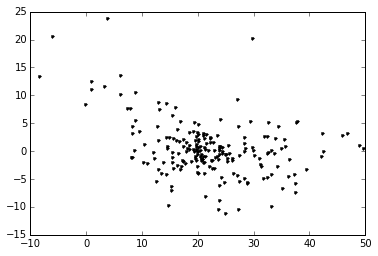

In [78]:
plt.plot(y_pred, price_test-y_pred,'k.')

(array([  7.,  19.,  58.,  78.,  25.,   9.,   5.,   2.,   0.,   3.]),
 array([-11.03581828,  -7.55029817,  -4.06477806,  -0.57925796,
          2.90626215,   6.39178226,   9.87730236,  13.36282247,
         16.84834258,  20.33386268,  23.81938279]),
 <a list of 10 Patch objects>)

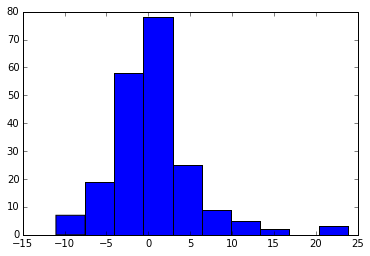

In [81]:
plt.hist(price_test - y_pred)